# Loan default prediction

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
seed = 42
sns.set(style="whitegrid")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

In [2]:
from datetime import datetime
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [4]:
!pip install six

In [5]:
!pip install category_encoders

In [6]:
#import pingouin as pg
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
import category_encoders
from category_encoders import BinaryEncoder
from IPython.display import Image
import pydotplus

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
ldf = pd.read_csv("training_data.csv")
ldf.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,4,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,Rs.0.0,Ahmedabad,Gujarat,Rs.0.0,7,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [9]:
ldf.shape

(105000, 26)

In [10]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [11]:
ldf.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained', 'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan', 'Borrower_Name ', 'Low_Documentation_Loan', 'Demography', 'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City', 'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code ', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [12]:
#Data cleaning
ldf["Guaranteed_Approved _Loan"]=ldf["Guaranteed_Approved _Loan"].apply(lambda x:x.replace("Rs.","")).astype("float")

In [13]:
ldf['ChargedOff_Amount ']=ldf['ChargedOff_Amount '].apply(lambda x:x.replace("Rs.","")).astype("float")

In [14]:
ldf['Gross_Amount_Balance']=ldf['Gross_Amount_Balance'].apply(lambda x:x.replace("Rs.","")).astype("float")

In [15]:
ldf["Loan_Approved_Gross"]=ldf['Loan_Approved_Gross'].apply(lambda x:x.replace("Rs.","")).astype("float")

In [16]:
ldf['Gross_Amount_Disbursed  ']=ldf['Gross_Amount_Disbursed  '].apply(lambda x:x.replace("Rs.","")).astype("float")

In [17]:
ldf.dtypes

ID                             int64
Date_Of_Disbursement          object
Business                      object
Jobs_Reatained                 int64
Jobs_Created                   int64
Year_Of_Commitment            object
Guaranteed_Approved _Loan    float64
Borrower_Name                 object
Low_Documentation_Loan        object
Demography                    object
State_Of_Bank                 object
ChargedOff_Amount            float64
Borrower_City                 object
Borrower_State                object
Gross_Amount_Balance         float64
Count_Employees                int64
Classification_Code            int64
Loan_Approved_Gross          float64
Gross_Amount_Disbursed       float64
Loan_Term                      int64
Commitment_Date               object
Primary_Loan_Digit             int64
Code_Franchise                 int64
Name_Of_Bank                  object
Revolving_Credit_Line         object
Default                        int64
dtype: object

# EDA

In [18]:
ldf.describe().round(3) #Stats of numeric attributes

,ID,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,ChargedOff_Amount,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default
count,105000.00,105000.00,105000.00,105000.00,105000.00,105000.00,105000.00,105000.00,105000.00,105000.00,105000.00,105000.00,105000.00,105000.00
mean,52499.50,12.69,10.38,11517381.58,1711913.02,76.38,9.90,405918.30,14922003.37,15638777.12,156.44,4661622163.72,2707.20,0.28
std,30311.03,270.54,270.34,18189159.66,6520105.92,24311.97,58.16,260335.96,22628520.41,22886265.74,116.41,2546598534.84,12660.61,0.45
min,0.00,0.00,0.00,40640.00,0.00,0.00,0.00,0.00,81280.00,325120.00,0.00,1000034009.00,0.00,0.00
25%,26249.75,0.00,0.00,1625600.00,0.00,0.00,2.00,236115.00,2600960.00,3251200.00,90.00,2478163259.25,0.00,0.00
50%,52499.50,1.00,0.00,4226560.00,0.00,0.00,4.00,447110.00,6502400.00,7802880.00,126.00,4119823502.00,1.00,0.00
75%,78749.25,4.00,1.00,13167360.00,617016.80,0.00,9.00,561740.00,16906240.00,18125785.44,180.00,6760484004.50,1.00,1.00
max,104999.00,8800.00,8800.00,365760000.00,162559918.72,7876682.24,7200.00,928120.00,406400000.00,731113600.00,692.00,9996003010.00,92006.00,1.00


In [19]:
ldf.describe(include=[np.object]) #stats of categorical attributes

C:\Users\sneha\AppData\Local\Temp/ipykernel_7436/922194772.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ldf.describe(include=[np.object]) #stats of categorical attributes


,Date_Of_Disbursement,Business,Year_Of_Commitment,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Commitment_Date,Name_Of_Bank,Revolving_Credit_Line
count,104765,104985,105000,104997,104633,105000,105000,105000,105000,105000,105000,104509
unique,3505,3,91,101068,7,3,34,1193,41,7719,143,11
top,31-Jul-95,Existing,2007,SUBWAY,No,Urban,TR,Jhansi,Maharashtra,30-Jan-04,ICICI Bank Ltd.,No
freq,1111,75091,6769,147,92135,57598,15552,1504,11699,128,11215,48122


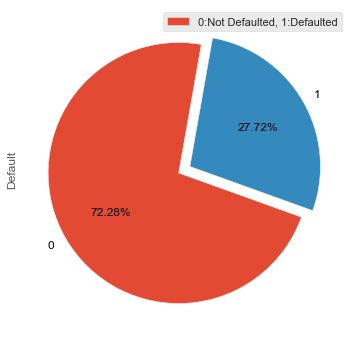

In [20]:
# Checking data balance/proportion
# pie chart
ldf.Default.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0:Not Defaulted, 1:Defaulted"])

Unbalanced data: target has 72.28% of non default results (value 0) against 27.72% of loans that ended up being default (value 1).

In [21]:
ldf.dtypes.sort_values(ascending=True)

ID                             int64
Code_Franchise                 int64
Primary_Loan_Digit             int64
Loan_Term                      int64
Classification_Code            int64
Count_Employees                int64
Default                        int64
Jobs_Created                   int64
Jobs_Reatained                 int64
ChargedOff_Amount            float64
Gross_Amount_Balance         float64
Gross_Amount_Disbursed       float64
Guaranteed_Approved _Loan    float64
Loan_Approved_Gross          float64
Name_Of_Bank                  object
Date_Of_Disbursement          object
Business                      object
Commitment_Date               object
Borrower_Name                 object
Borrower_State                object
Revolving_Credit_Line         object
State_Of_Bank                 object
Demography                    object
Low_Documentation_Loan        object
Year_Of_Commitment            object
Borrower_City                 object
dtype: object

In [22]:
ldf.dtypes.value_counts()

object     12
int64       9
float64     5
dtype: int64

In [23]:
#missing values detection
nulval = ldf.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
ID,0,0.00
Date_Of_Disbursement,235,21.15
Business,15,1.35
Jobs_Reatained,0,0.00
Jobs_Created,0,0.00
Year_Of_Commitment,0,0.00
Guaranteed_Approved _Loan,0,0.00
Borrower_Name,3,0.27
Low_Documentation_Loan,367,33.03
Demography,0,0.00


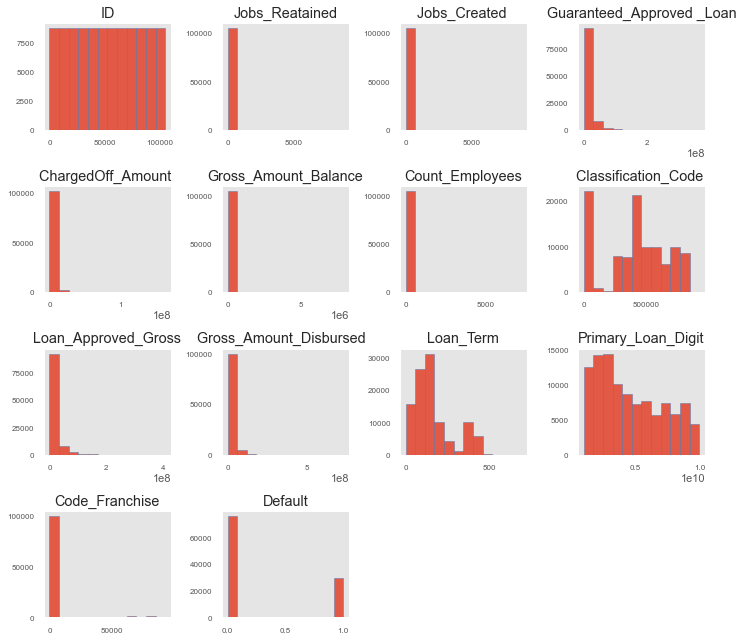

In [24]:
#for numerical variables
ldf.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

In [25]:
ldf.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained', 'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan', 'Borrower_Name ', 'Low_Documentation_Loan', 'Demography', 'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City', 'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code ', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

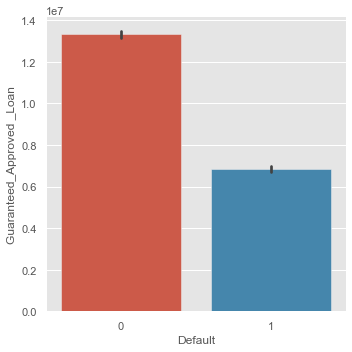

In [26]:
sns.catplot(x="Default",y='Guaranteed_Approved _Loan',kind="bar",data=ldf) #loans involving 3rd party are less likely to get default
plt.show()

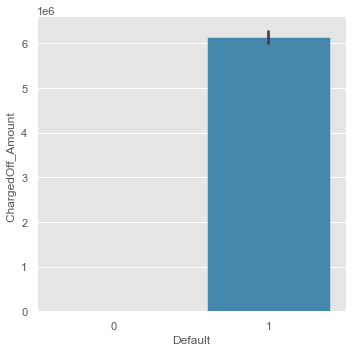

In [27]:
sns.catplot(x="Default",y='ChargedOff_Amount ',kind="bar",data=ldf) #loans involving 3rd party are less likely to get default
plt.show()

In [28]:
#All accounts loan with charged off amount are defaulted

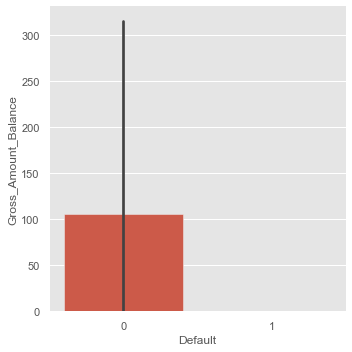

In [29]:
sns.catplot(x="Default",y='Gross_Amount_Balance',kind="bar",data=ldf) #loans involving 3rd party are less likely to get default
plt.show()

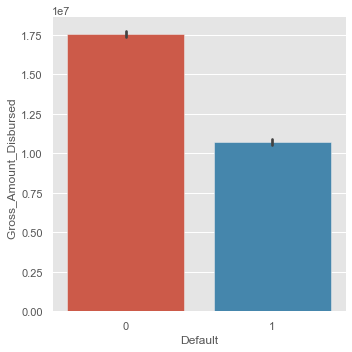

In [30]:
sns.catplot(x="Default",y='Gross_Amount_Disbursed  ',kind="bar",data=ldf) #loans involving 3rd party are less likely to get default
plt.show()

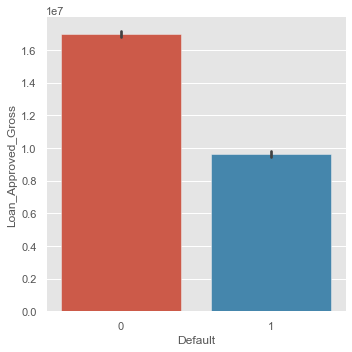

In [31]:
sns.catplot(x="Default",y='Loan_Approved_Gross',kind="bar",data=ldf) #loans involving 3rd party are less likely to get default
plt.show()

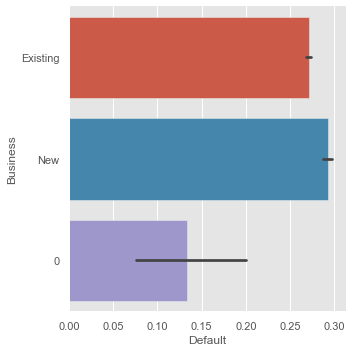

In [32]:
sns.catplot(x="Default",y="Business",kind="bar",data=ldf)
plt.show()

In [33]:
#default rate is more for those who have new business

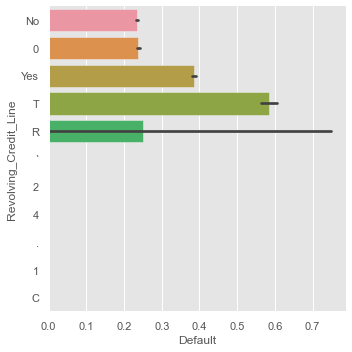

In [34]:
sns.catplot(x="Default",y='Revolving_Credit_Line',kind="bar",data=ldf)
plt.show()

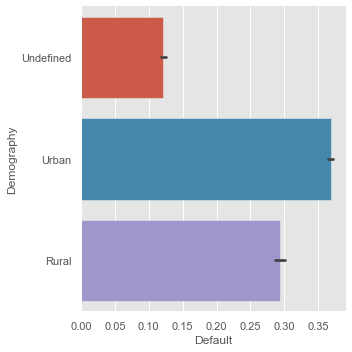

In [35]:
sns.catplot(x="Default",y='Demography',kind="bar",data=ldf)
plt.show()

In [36]:
#Urban people defaulting rate is high

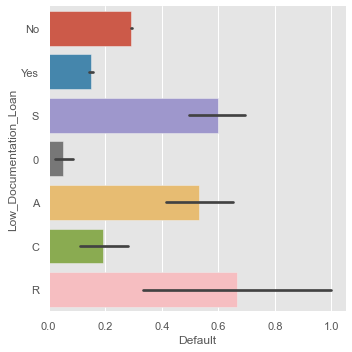

In [37]:
sns.catplot(x="Default",y='Low_Documentation_Loan',kind="bar",data=ldf)
plt.show()

In [38]:
#S,A,R categories are more on default side

In [39]:
ldf.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained', 'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan', 'Borrower_Name ', 'Low_Documentation_Loan', 'Demography', 'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City', 'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code ', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

<Figure size 2160x1440 with 0 Axes>

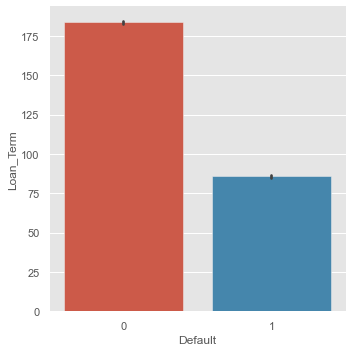

In [40]:
plt.figure(figsize=(30,20))
sns.catplot(x="Default",y='Loan_Term',kind="bar",data=ldf)
plt.show()

In [41]:
#More the loan term default rate is less, here loan of term above 75months are not defaulted

<Figure size 2160x1440 with 0 Axes>

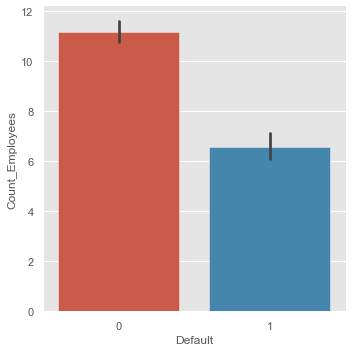

In [42]:
plt.figure(figsize=(30,20))
sns.catplot(x="Default",y='Count_Employees',kind="bar",data=ldf)
plt.show()

In [43]:
#Those businesses having employee count greater than 7 are not defaulting on loan

<Figure size 2160x1440 with 0 Axes>

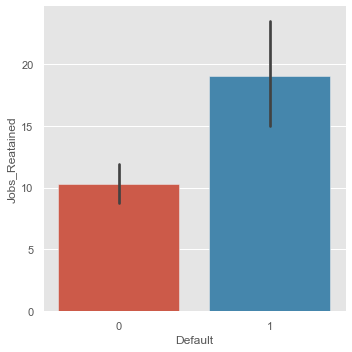

In [44]:
plt.figure(figsize=(30,20))
sns.catplot(x="Default",y='Jobs_Reatained',kind="bar",data=ldf)
plt.show()

In [45]:
#More than 11 jobs retained in business, then  person is more likely to default on loan

<Figure size 2160x1440 with 0 Axes>

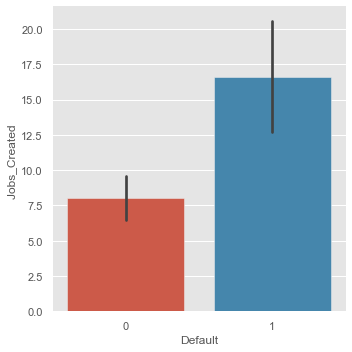

In [46]:
plt.figure(figsize=(30,20))
sns.catplot(x="Default",y='Jobs_Created ',kind="bar",data=ldf)
plt.show()

In [47]:
#More than 8 jobs are created in business, then  person is more likely to default on loan

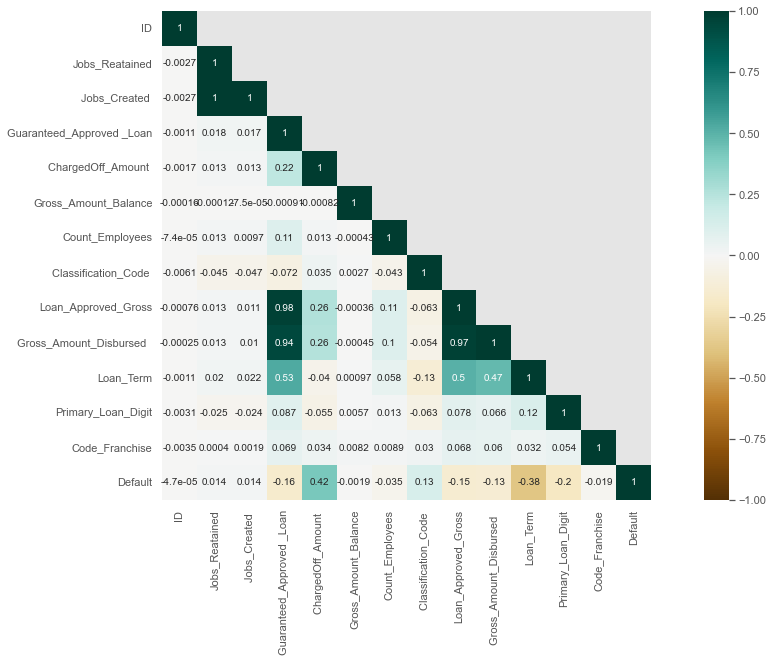

In [48]:
mask = np.triu(ldf.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(ldf.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [49]:
#None of the variables highly correlated with Default
#Charged_off_amount is bit correlated with target

# Data cleansing and Feature selection

In [50]:
data_ca = ldf.select_dtypes(exclude=["int64","float64"]).copy()
data_nu = ldf.select_dtypes(exclude=["object","category"]).copy()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\ProgramData\

IndexError: index 12 is out of bounds for axis 0 with size 12

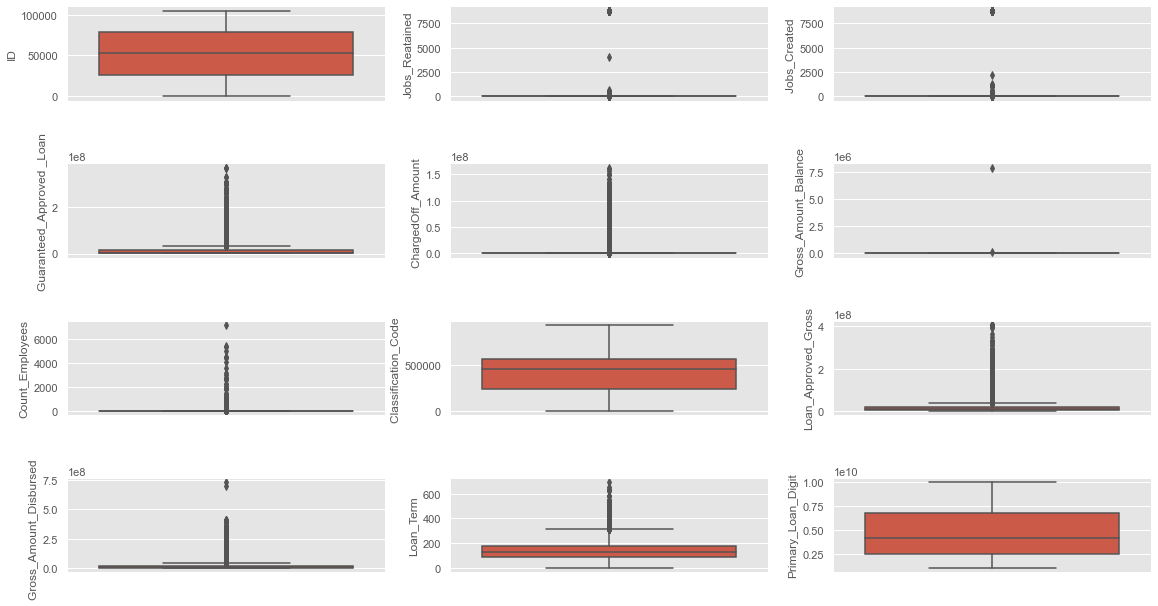

In [51]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(16, 8))
index = 0
axs = axs.flatten()
for k,v in data_nu.items():
    sns.boxplot(y=k, data=data_nu, ax=axs[index], orient="h")
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [52]:
#there are outliers in some of the variables

In [53]:
#Outlier treatment
#for numerical set data_nu
# Outlier removal
print(data_nu.shape)
Q1 = data_nu.quantile(0.25)
Q3 = data_nu.quantile(0.75)
IQR = Q3 - Q1
data_nu = data_nu[~((data_nu < (Q1 - 1.5 * IQR)) | (data_nu > (Q3 + 1.5 * IQR))).any(axis=1)]
data_nu.shape

(105000, 14)


(49360, 14)

In [54]:
#Missing value 
for column in ldf.columns:
    if ldf[column].isna().sum() != 0:
        missing = ldf[column].isna().sum()
        portion = (missing / ldf.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")

'Date_Of_Disbursement': number of missing values '235' ---> '0.224%'
'Business': number of missing values '15' ---> '0.014%'
'Borrower_Name ': number of missing values '3' ---> '0.003%'
'Low_Documentation_Loan': number of missing values '367' ---> '0.350%'
'Revolving_Credit_Line': number of missing values '491' ---> '0.468%'


In [55]:
ldf['Business'] = ldf.Business.fillna(ldf.Business.value_counts().index[0])
print(f"Imputation done. Missing values: {ldf.Business.isnull().sum()}")


Imputation done. Missing values: 0


In [56]:
ldf['Low_Documentation_Loan'] = ldf.Low_Documentation_Loan.fillna(ldf.Low_Documentation_Loan.value_counts().index[0])
print(f"Imputation done. Missing values: {ldf.Low_Documentation_Loan.isnull().sum()}")


Imputation done. Missing values: 0


In [57]:
ldf['Revolving_Credit_Line'] = ldf.Revolving_Credit_Line.fillna(ldf.Revolving_Credit_Line.value_counts().index[0])
print(f"Imputation done. Missing values: {ldf.Revolving_Credit_Line.isnull().sum()}")


Imputation done. Missing values: 0


#  FEATURE SELECTION

In [58]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         105000 non-null  int64  
 1   Date_Of_Disbursement       104765 non-null  object 
 2   Business                   105000 non-null  object 
 3   Jobs_Reatained             105000 non-null  int64  
 4   Jobs_Created               105000 non-null  int64  
 5   Year_Of_Commitment         105000 non-null  object 
 6   Guaranteed_Approved _Loan  105000 non-null  float64
 7   Borrower_Name              104997 non-null  object 
 8   Low_Documentation_Loan     105000 non-null  object 
 9   Demography                 105000 non-null  object 
 10  State_Of_Bank              105000 non-null  object 
 11  ChargedOff_Amount          105000 non-null  float64
 12  Borrower_City              105000 non-null  object 
 13  Borrower_State             10

In [59]:
#Lets drop IDs
ldf.drop(["ID",'Primary_Loan_Digit','Code_Franchise','Classification_Code '],axis=1, inplace=True)

In [60]:
#Lets drop dates and years
ldf.drop(['Date_Of_Disbursement','Commitment_Date','Year_Of_Commitment '],axis=1, inplace=True)

In [61]:
#Lets drop some irrelevant features
ldf.drop(['Borrower_Name ','Borrower_City', 'Borrower_State','Name_Of_Bank','State_Of_Bank'],axis=1, inplace=True)

In [62]:
ldf.drop(["Revolving_Credit_Line"],axis=1,inplace=True)

In [63]:
ldf.head()

,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,ChargedOff_Amount,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Default
0,Existing,0,0,33121600.00,No,Undefined,0.00,0.00,38,40640000.00,40640000.00,126,0
1,New,0,6,32735520.00,No,Urban,38283367.68,0.00,6,43647360.00,43647360.00,123,1
2,Existing,4,0,1422400.00,No,Urban,0.00,0.00,4,2844800.00,5961400.32,90,0
3,New,9,1,2032000.00,No,Urban,0.00,0.00,7,4064000.00,4064000.00,126,0
4,Existing,4,0,22981920.00,No,Urban,22862519.68,0.00,4,30642560.00,30642560.00,104,1


In [64]:
ldf.columns

Index(['Business', 'Jobs_Reatained', 'Jobs_Created ', 'Guaranteed_Approved _Loan', 'Low_Documentation_Loan', 'Demography', 'ChargedOff_Amount ', 'Gross_Amount_Balance', 'Count_Employees', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term', 'Default'], dtype='object')

In [65]:
ldf.shape 

(105000, 13)

In [66]:
data_nu = ldf.select_dtypes(exclude=["object","category"]).copy()

In [67]:
Xnum = data_nu.drop(["Default"], axis= "columns")
ynum = data_nu.Default

In [68]:
# Identifying the predictive features using the Pearson Correlation p-value
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], 
    ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,
).round(4)
#Strategy: Drop (p-value > 0.05) → low information to the target, and keep all the others.

,Pearson Corr.,p-value
Jobs_Reatained,0.01,0.00
Jobs_Created,0.01,0.00
Guaranteed_Approved _Loan,-0.16,0.00
ChargedOff_Amount,0.42,0.00
Gross_Amount_Balance,-0.00,0.53
Count_Employees,-0.04,0.00
Loan_Approved_Gross,-0.14,0.00
Gross_Amount_Disbursed,-0.13,0.00
Loan_Term,-0.38,0.00


So, according to our strategy we need to drop Gross_amount_Balance, since it's p-val is>0.05

In [69]:
ldf.drop(['Gross_Amount_Balance'],axis=1, inplace=True)

In [70]:
ldf.shape

(105000, 12)

In [71]:
Xcat = ldf.select_dtypes(exclude=['int64','float64']).copy()

In [72]:
Xcat['target'] = ldf.Default
Xcat.dropna(how="any", inplace=True)
ycat = Xcat.target
Xcat.drop("target", axis=1, inplace=True)

In [73]:
#Chi square test for independance
for col in Xcat.columns:
    table = pd.crosstab(Xcat[col], ycat)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")
#Strategy: Keep all features (p-value < 0.05). The categorical variables have predictive power.

target,0,1
Business,,
0,91,14
Existing,54734,20372
New,21071,8718


p-value: 0.0000000000001099342341876



target,0,1
Low_Documentation_Loan,,
0,164,9
A,28,32
C,72,17
No,65320,27182
R,2,4
S,38,57
Yes,10272,1803


p-value: 0.0000000000000000000000000



target,0,1
Demography,,
Rural,8690,3613
Undefined,30831,4268
Urban,36375,21223


p-value: 0.0000000000000000000000000


So, here all categorical variables have predictive power,since p_val of all is <0.05

# ENCODING & TRANSFORMATIONS

In [74]:
ldf.columns

Index(['Business', 'Jobs_Reatained', 'Jobs_Created ', 'Guaranteed_Approved _Loan', 'Low_Documentation_Loan', 'Demography', 'ChargedOff_Amount ', 'Count_Employees', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term', 'Default'], dtype='object')

In [75]:
#Let’s continue by encoding and transforming the categorical variables into numeric ones.

In [76]:
ldf["Business"].value_counts()

Existing    75106
New         29789
0             105
Name: Business, dtype: int64

In [77]:
ldf['Low_Documentation_Loan'].value_counts()

No     92502
Yes    12075
0        173
S         95
C         89
A         60
R          6
Name: Low_Documentation_Loan, dtype: int64

In [78]:
ldf['Demography'].value_counts()

Urban        57598
Undefined    35099
Rural        12303
Name: Demography, dtype: int64

In [79]:
#Lets go for one hot encoding
ldf = pd.get_dummies(ldf,columns=["Business",'Low_Documentation_Loan','Demography'])
ldf.head(10)

,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Default,Business_0,Business_Existing,Business_New,Low_Documentation_Loan_0,Low_Documentation_Loan_A,Low_Documentation_Loan_C,Low_Documentation_Loan_No,Low_Documentation_Loan_R,Low_Documentation_Loan_S,Low_Documentation_Loan_Yes,Demography_Rural,Demography_Undefined,Demography_Urban
0,0,0,33121600.00,0.00,38,40640000.00,40640000.00,126,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,6,32735520.00,38283367.68,6,43647360.00,43647360.00,123,1,0,0,1,0,0,0,1,0,0,0,0,0,1
2,4,0,1422400.00,0.00,4,2844800.00,5961400.32,90,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,9,1,2032000.00,0.00,7,4064000.00,4064000.00,126,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,4,0,22981920.00,22862519.68,4,30642560.00,30642560.00,104,1,0,1,0,0,0,0,1,0,0,0,0,0,1
5,3,0,203200.00,0.00,3,406400.00,406400.00,126,0,0,1,0,0,0,0,1,0,0,0,0,0,1
6,3,3,1016000.00,2022896.64,2,2032000.00,7063232.00,96,1,0,0,1,0,0,0,1,0,0,0,0,0,1
7,0,0,3352800.00,0.00,10,4470400.00,4470400.00,270,0,0,1,0,0,0,0,1,0,0,0,0,1,0
8,1,3,4925568.00,0.00,1,9851136.00,9851136.00,126,0,0,0,1,0,0,0,1,0,0,0,0,0,1
9,20,2,406400.00,0.00,16,812800.00,812800.00,126,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [80]:
ldf.shape

(105000, 22)

In [81]:
ldf.columns

Index(['Jobs_Reatained', 'Jobs_Created ', 'Guaranteed_Approved _Loan', 'ChargedOff_Amount ', 'Count_Employees', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term', 'Default', 'Business_0', 'Business_Existing', 'Business_New', 'Low_Documentation_Loan_0', 'Low_Documentation_Loan_A', 'Low_Documentation_Loan_C', 'Low_Documentation_Loan_No', 'Low_Documentation_Loan_R',
       'Low_Documentation_Loan_S', 'Low_Documentation_Loan_Yes', 'Demography_Rural', 'Demography_Undefined', 'Demography_Urban'],
      dtype='object')

# Test set

In [82]:
ldftst=pd.read_csv("testing_data.csv")
ldftst.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,GJ,Rs.8050784.0,Safidon,Haryana,Rs.0.0,17,326199,Rs.8128000.0,Rs.9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,AS,Rs.0.0,Nanjikottai,Tamil Nadu,Rs.0.0,2,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,ML,Rs.1625600.0,Tonk,Rajasthan,Rs.0.0,2,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes
3,105003,31-Jul-00,New,2,0,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,TR,Rs.0.0,Musabani,Jharkhand,Rs.0.0,2,0,Rs.4064000.0,Rs.6916196.48,18,28-Jun-00,3814664008,1,Aryavart Bank,Yes
4,105004,30-Jun-05,Existing,0,0,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,TR,Rs.0.0,Adityapur,Jharkhand,Rs.0.0,6,441310,Rs.31292800.0,Rs.31292800.0,219,2-May-05,8830244003,1,Paschim Banga Gramin Bank,No


In [83]:
ldftst_id=ldftst["ID"]

In [84]:
ldftst.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained', 'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan', 'Borrower_Name ', 'Low_Documentation_Loan', 'Demography', 'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City', 'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code ', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line'],
      dtype='object')

In [85]:
ldftst['Revolving_Credit_Line'].value_counts() 

No     20491
Yes    10684
Name: Revolving_Credit_Line, dtype: int64

In [86]:
ldftst["Guaranteed_Approved _Loan"]=ldftst["Guaranteed_Approved _Loan"].apply(lambda x:x.replace("Rs.","")).astype("float")


In [87]:
ldftst['ChargedOff_Amount ']=ldftst['ChargedOff_Amount '].apply(lambda x:x.replace("Rs.","")).astype("float")

In [88]:
ldftst['Gross_Amount_Balance']=ldftst['Gross_Amount_Balance'].apply(lambda x:x.replace("Rs.","")).astype("float")

In [89]:
ldftst["Loan_Approved_Gross"]=ldftst['Loan_Approved_Gross'].apply(lambda x:x.replace("Rs.","")).astype("float")

In [90]:
ldftst['Gross_Amount_Disbursed  ']=ldftst['Gross_Amount_Disbursed  '].apply(lambda x:x.replace("Rs.","")).astype("float")

In [91]:
ldftst.drop(["ID",'Primary_Loan_Digit','Code_Franchise','Classification_Code '],axis=1, inplace=True)



In [92]:
ldftst.drop(['Date_Of_Disbursement','Commitment_Date','Year_Of_Commitment '],axis=1, inplace=True)

In [93]:
ldftst.drop(['Borrower_Name ','Borrower_City', 'Borrower_State','Name_Of_Bank','State_Of_Bank'],axis=1, inplace=True)

In [94]:
ldftst.drop(['Gross_Amount_Balance'],axis=1, inplace=True)

In [95]:
ldftst.drop(['Revolving_Credit_Line'],axis=1, inplace=True)

In [96]:
ldftst= pd.get_dummies(ldftst,columns=["Business",'Low_Documentation_Loan','Demography'])
ldftst.head(10)

,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Business_0,Business_Existing,Business_New,Low_Documentation_Loan_0,Low_Documentation_Loan_A,Low_Documentation_Loan_C,Low_Documentation_Loan_No,Low_Documentation_Loan_R,Low_Documentation_Loan_S,Low_Documentation_Loan_Yes,Demography_Rural,Demography_Undefined,Demography_Urban
0,19,0,4064000.00,8050784.00,17,8128000.00,9403852.16,57,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1463040.00,0.00,2,1625600.00,1625600.00,90,0,1,0,0,0,0,0,0,0,1,0,1,0
2,7,5,812800.00,1625600.00,2,1625600.00,3450336.00,81,0,1,0,0,0,0,1,0,0,0,0,0,1
3,2,0,2032000.00,0.00,2,4064000.00,6916196.48,18,0,0,1,0,0,0,1,0,0,0,0,0,1
4,0,0,23469600.00,0.00,6,31292800.00,31292800.00,219,0,1,0,0,0,0,1,0,0,0,1,0,0
5,0,0,13817600.00,0.00,4,16256000.00,16256000.00,14,0,1,0,0,0,0,1,0,0,0,0,1,0
6,0,0,15240000.00,4356689.28,2,20320000.00,20320000.00,168,0,0,1,0,0,0,1,0,0,0,0,1,0
7,6,1,2032000.00,3893474.56,5,4064000.00,10395630.72,100,0,1,0,0,0,0,1,0,0,0,0,0,1
8,2,4,5527040.00,0.00,2,6502400.00,6502400.00,126,0,0,1,0,0,0,1,0,0,0,0,0,1
9,3,0,3048000.00,4172021.12,3,6096000.00,16421486.08,32,0,0,1,0,0,0,1,0,0,0,0,0,1


In [97]:
ldftst.shape

(45000, 21)

# Model Building

In [98]:
df_lr=ldf.copy()

In [99]:
X = df_lr.drop(columns="Default", axis= 1)
y = df_lr["Default"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.428571428571, random_state=47)

In [101]:
#Decision tree classifier
def get_train_report(model):
    train_pred=model.predict(X_train)
    return(classification_report(y_train,train_pred))

In [102]:
def get_test_report(model):
    test_pred=model.predict(X_test)
    return(classification_report(y_test,test_pred))

In [103]:
decision_tree_classification=DecisionTreeClassifier(criterion="entropy",random_state=10)
decision_tree=decision_tree_classification.fit(X_train,y_train)

In [104]:
train_report=get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43368
           1       1.00      1.00      1.00     16632

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [105]:
test_report=get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     32528
           1       0.98      0.98      0.98     12472

    accuracy                           0.99     45000
   macro avg       0.99      0.99      0.99     45000
weighted avg       0.99      0.99      0.99     45000



In [106]:
#ldftst

In [107]:
test_pred=decision_tree.predict(ldftst)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     32528
           1       0.27      0.27      0.27     12472

    accuracy                           0.60     45000
   macro avg       0.50      0.50      0.50     45000
weighted avg       0.60      0.60      0.60     45000



In [109]:
testpredicted = pd.DataFrame({"ID":ldftst_id, "Default":test_pred})
testpredicted = testpredicted.set_index("ID")
testpredicted.head()

,Default
ID,
105000,1
105001,0
105002,1
105003,0
105004,0


In [111]:
testpredicted.to_csv("submission1.csv")